<a href="https://colab.research.google.com/github/ZahraVakil/BhratIntern_DataScienceTasks/blob/main/NN_NumberRecognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
#2d array 0-black 255-white
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train[0]

5

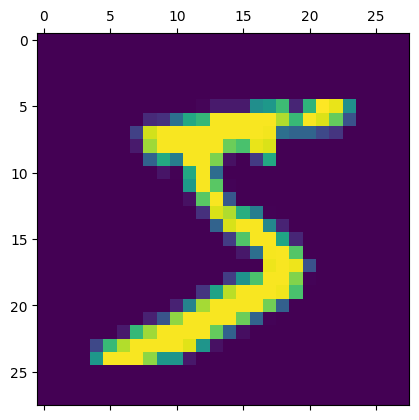

In [8]:
plt.matshow(x_train[0])

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
#scaling array value between 0 t0 1 to increase ACCURACY
x_train= x_train/255
x_test = x_test/255

In [11]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [12]:
#reshape the image in 1d array (flatten th 2d array)
x_train_flat= x_train.reshape(len(x_train), 28*28)
x_test_flat= x_test.reshape(len(x_test), 28*28)

x_train_flat.shape

(60000, 784)

Creating Neural Network
**Input layer = 28*28 = 784 elements**
**output layer = 0 to 9 = 10 elements**

In [13]:
from keras.api._v2.keras import metrics
from keras.engine.training import optimizer
#defining simple NN
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])

model.compile(optimizer= 'adam',
              loss= 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])

model.fit(x_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4696 - accuracy: 0.8785
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3032 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2830 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2729 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2667 - accuracy: 0.9261


In [14]:
#accuracy in test ds
model.evaluate(x_test_flat, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2673 - accuracy: 0.9264


[0.26726946234703064, 0.9264000058174133]

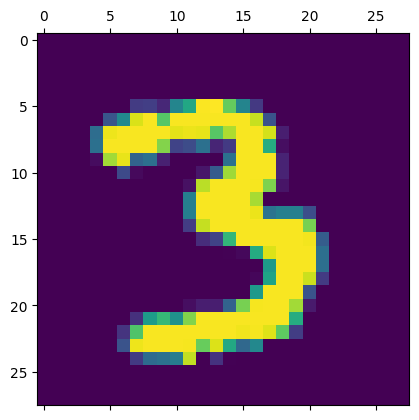

In [15]:
plt.matshow(x_test[500])


In [16]:
y_predicted= model.predict(x_test_flat)
y_predicted[500] #printing score weight of all op nodes

313/313 [==============================] - 0s 1ms/step


array([6.0731451e-05, 5.6630524e-05, 9.3196861e-02, 9.9991423e-01,
       8.0253143e-05, 3.2714162e-02, 9.3974620e-07, 3.8343552e-01,
       7.1864754e-02, 3.4212880e-03], dtype=float32)

In [17]:
np.argmax(y_predicted[500])

3

In [18]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[0:5]

[7, 2, 1, 0, 4]

In [19]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [20]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   7,    9,  926,   20,    6,    2,   12,    9,   36,    5],
       [   2,    0,   16,  936,    1,   17,    2,    9,   19,    8],
       [   1,    1,    4,    2,  912,    0,   11,    4,   10,   37],
       [  11,    2,    4,   41,   10,  769,   15,    5,   29,    6],
       [  13,    3,    7,    1,    7,   10,  913,    2,    2,    0],
       [   1,    5,   24,    8,    7,    0,    0,  944,    2,   37],
       [   7,    7,    8,   26,    9,   27,    8,   10,  865,    7],
       [  10,    7,    1,   14,   25,    6,    0,   15,    7,  924]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

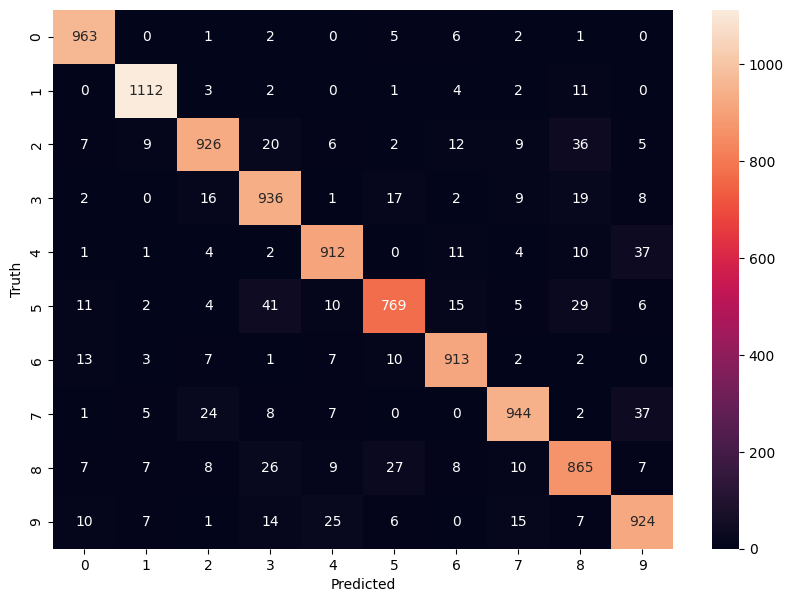

In [21]:
import seaborn as sn
plt.figure(figsize =(10,7))
sn.heatmap(cm, annot =True, fmt ='d')
plt.xlabel ("Predicted")
plt.ylabel("Truth")

--Optimizing Codee--adding hidden layer

In [24]:
from keras.api._v2.keras import metrics
from keras.engine.training import optimizer
#defining simple NN
model = keras.Sequential([
    #no of neurons--100
    keras.layers.Dense(100, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')

])

model.compile(optimizer= 'adam',
              loss= 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])

model.fit(x_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2763 - accuracy: 0.9204
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1247 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0871 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0656 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0517 - accuracy: 0.9841


In [25]:
#accuracy in test ds
model.evaluate(x_test_flat, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0810 - accuracy: 0.9746


[0.08104586601257324, 0.9746000170707703]